# Experiment 1
## Sagar Lamani   191EE144
### Date: 30.08.2021

In [40]:
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [41]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 12})



In [42]:
#Roll number: 191EE144
alpha = 1 + 144 % 4  
print(alpha)

1


#### Problem 1

In [43]:
def create_signal(t,alpha):
    return np.exp(-t/alpha)

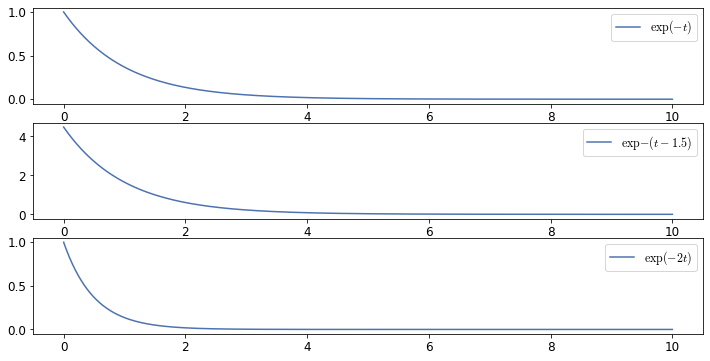

In [44]:
t = np.linspace(0,10,num = 1001 )
y1 = create_signal(t,alpha)
y2 = create_signal(t - 1.5*alpha,alpha)
y3 = create_signal(2*t,alpha)

plt.subplot(3,1,1)
plt.plot(t,y1,label = '$\exp{(-t)}$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,y2,label = '$\exp{-(t - 1.5)}$' )
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,y3,label = '$\exp{(-2t)}$')
plt.legend()

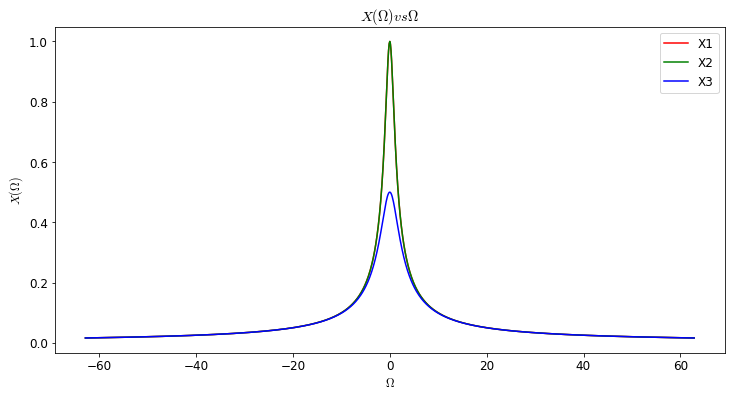

In [45]:

#Fourier Transform analytics
w = 2*np.pi*np.linspace(-10,10,num = 1001)
X1 = 1/(1j*w + (1/alpha))
X2 = (np.exp(-1j*w*(1.5*alpha)))/(1j*w+(1/alpha)) #Y2 = Y1(w)* exp(-jwt0)
X3 = 0.5 * 1/((1j*w*0.5)+(1/alpha))               # Y3 = 1/2 * Y1(w/2)

plt.figure()
plt.title(r"$X(\Omega)  vs  \Omega$")
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$X(\Omega)$')
plt.plot(w,np.abs(Y1),'r',label='X1')
plt.legend()
plt.plot(w,np.abs(Y2),'g',label='X2')
plt.legend()
plt.plot(w,np.abs(Y3),'b',label='X3')
plt.legend()

#### Problem 2

<StemContainer object of 3 artists>

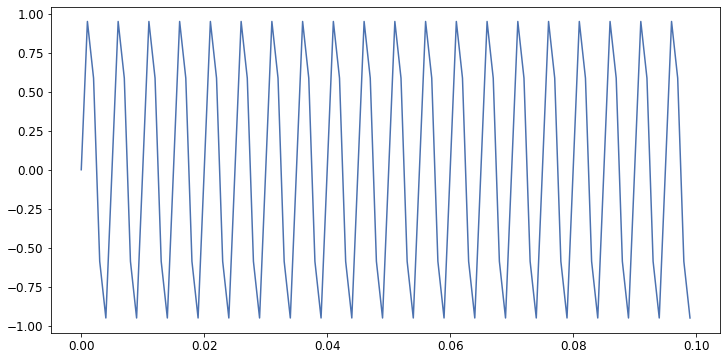

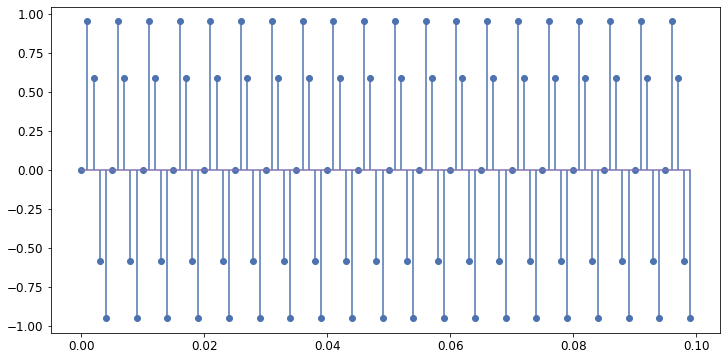

In [46]:
f1 = 200*alpha
f2 = 220*alpha
t = np.linspace(0,4.999,num = 5000)
y1 = np.sin(2*np.pi*f1*t)
y2 = np.sin(2*np.pi*f2*t)
y = np.append(y1,y2,axis = 0)

plt.plot(t[0:100],y[0:100])
plt.figure()
plt.stem(t[0:100],y[0:100])

#### Problem 3

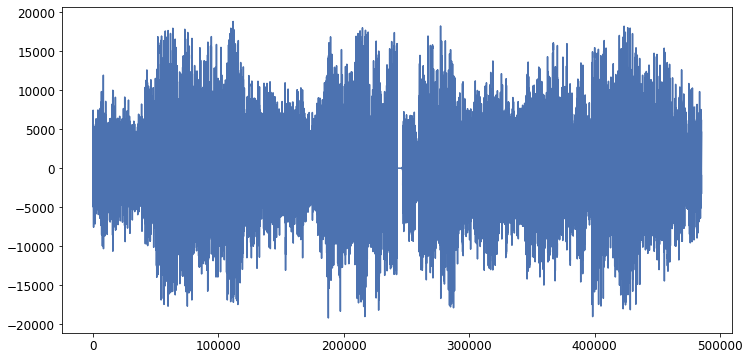

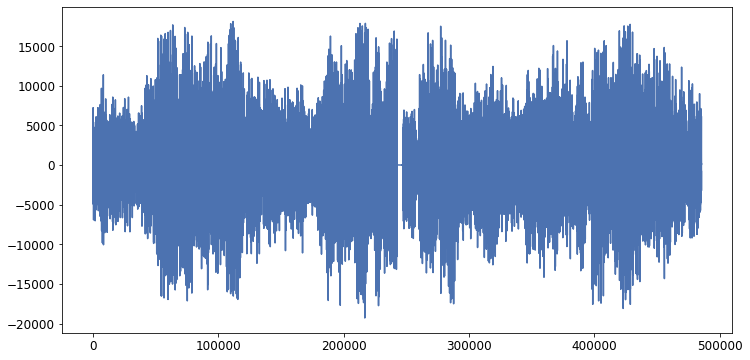

In [47]:
conv_text1 = np.loadtxt('Experiment-1\ConvFile1.txt')
Fs, track0 = wavfile.read('Experiment-1\Track001.wav')

convolved_signal1 = scipy.signal.convolve(track0,conv_text1)
IPython.display.Audio(convolved_signal1,rate = Fs)

plt.plot(np.fft.fftshift(track0))
plt.figure()
plt.plot(np.fft.fftshift(convolved_signal1))

In [48]:
conv_text = np.loadtxt('Experiment-1\ConvFile1.txt')
Fs, track = wavfile.read('Experiment-1\Track001.wav')

track1 = []
for i in range(len(track)):
    track1.append(track[i])
    
IPython.display.Audio(track1, rate = Fs)

In [49]:
convolved_signal = scipy.signal.convolve(track1,conv_text)
wavfile.write('Experiment-1\Convolved_signal.wav',Fs,convolved_signal)
IPython.display.Audio(convolved_signal,rate = Fs)




The convolved signal has suppressed low frequencies from the track. Hence the ConvFile3 contains samples from a High Pass filter

#### Problem 4

In [50]:
Fs, speech = wavfile.read('speech.wav')
print('Sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(speech, rate=Fs)

Sampling rate: 16000Hz


In [51]:
def multiply_signals(x, f, Fs):
    w = 2*pi*(float(f) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))

y = multiply_signals(speech, 500, Fs)
IPython.display.Audio(y, rate=Fs)

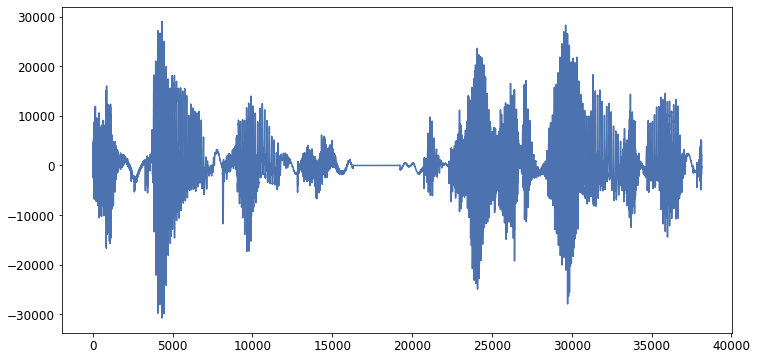

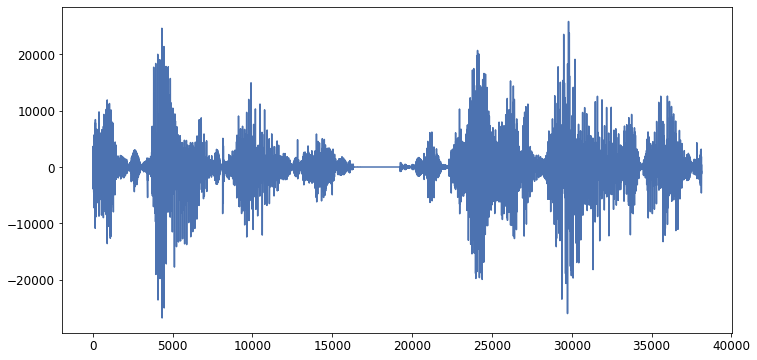

In [52]:
plt.plot(np.fft.fftshift(speech))
plt.figure()
plt.plot(np.fft.fftshift(y))

In [53]:
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{x}(\gamma)$')
    return N, X
    
    

(array([0.00000000e+00, 4.19661124e-01, 8.39322247e-01, ...,
        7.99874102e+03, 7.99916068e+03, 7.99958034e+03]),
 array([1179833.605536  , 1217214.06005538, 1163872.15602042, ...,
         228608.69469601,   40455.30936305,   60185.82048473]))

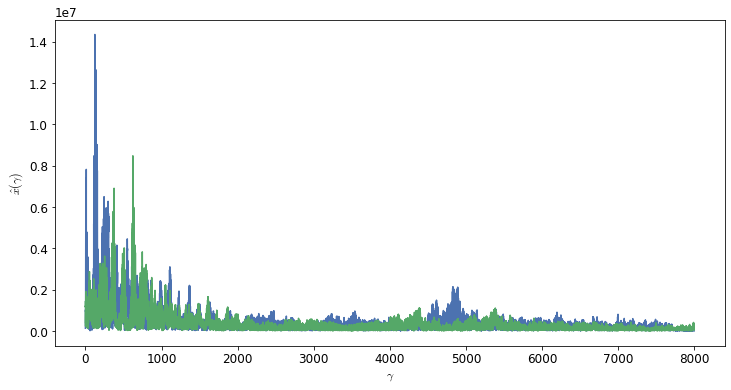

In [54]:
plot_spec(speech, Fs, Fs/2)
plot_spec(y, Fs, Fs/2)